# Polynomial Regression
The first question I needed to ask myself is why decide to use Polynomial Regression and what does it do exactly? So according to the visualizations from the <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> notebook, the connection between the dependent and independent variables appear to be strongly linear in relationship although the connection between the 'Volume' of daily bitcoin bought and sold has less association with the daily 'Close' price. 

Fitting a Linear Regression line to the data may be accurate in this case, with an R-squared value of 0.9991392014437468 and RMSE of 689.1925598643533. However, out of curiosity I decided to see if a Polynomial function could fit the line slightly better by employing a regularization technique to try and improve the bias term by decreasing the Mean Squared Error.

The r-squared value is used to represent the overall accuracy score and directly measures the degree of variability associated between the predictors and target variable. The root mean squared value is represented as a loss function and my aim is to reduce its overall value as much as possible using regularization.

I know that Polynomial Regression is useful in determining non-linear relationships between multiple independent variables and the dependent variable, so it can be classified as a type of multiple linear regression. I can try to improve the fit of a prediction line to the data and improve estimates by changing the 'degree of fit' parameter, or by utilizing regularization.

## Import Data
Keeping the data loading simple this time will reduce the overall time it takes to retrieve.

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

This reads the entire dataset and then stores all the values in a single dataframe object.

## Feature Selection and Scaling
Checking to see what features are present within the current dataframe.

In [2]:
# all column names
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Now to remove the columns I don't need including 'Date' and 'Adj Close', selecting only the remaining ones to include in the X variable such as 'Open', 'High', 'Low' and 'Volume'. The remaining column of 'Close' in the same dataframe will be used as the target variable output, y.

In [3]:
# remove feature with string values - Date
del bitcoin['Date']

# remove adj close as I will not be using this
del bitcoin['Adj Close']

# see the remaining features
bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Assigning features to X gives:

In [4]:
# select features as X dataframe
X = bitcoin[['Open','High','Low','Volume','Close']]
print(X)

         Open      High       Low        Volume     Close
0     9718.07   9838.33   9728.25  4.624843e+10   9763.94
1     9762.68  10125.87   9747.39  4.716635e+10  10096.28
2    10102.09  10533.73  10009.76  6.119120e+10  10451.16
3    10457.43  10678.71  10457.43  4.881932e+10  10642.81
4    10642.22  10773.18  10601.61  4.643028e+10  10669.64
..        ...       ...       ...           ...       ...
360  79368.23  79831.47  75262.20  1.050000e+11  77018.32
361  76964.70  78268.41  75503.00  8.272967e+10  75906.36
362  75928.95  76373.72  66081.83  1.220000e+11  70374.91
363  70344.11  71803.61  68107.27  8.183693e+10  69788.23
365  71509.30  71556.76  71132.08  8.495634e+10  71477.76

[362 rows x 5 columns]


Comparing the shape of the overall dataset before polynomial regression and before splitting gives:

In [5]:
X.shape

(362, 5)

In [6]:
# select target as y series
y = bitcoin['Close']
print(y)

0       9763.94
1      10096.28
2      10451.16
3      10642.81
4      10669.64
         ...   
360    77018.32
361    75906.36
362    70374.91
363    69788.23
365    71477.76
Name: Close, Length: 362, dtype: float64


In [7]:
y.shape

(362,)

Another way to select the right column vectors is using indexation.

In [8]:
X = X.iloc[:,0:5].values
print(X[0:10])

[[9.71807000e+03 9.83833000e+03 9.72825000e+03 4.62484281e+10
  9.76394000e+03]
 [9.76268000e+03 1.01258700e+04 9.74739000e+03 4.71663519e+10
  1.00962800e+04]
 [1.01020900e+04 1.05337300e+04 1.00097600e+04 6.11912020e+10
  1.04511600e+04]
 [1.04574300e+04 1.06787100e+04 1.04574300e+04 4.88193179e+10
  1.06428100e+04]
 [1.06422200e+04 1.07731800e+04 1.06016100e+04 4.64302791e+10
  1.06696400e+04]
 [1.06699200e+04 1.08566800e+04 1.06576200e+04 4.66636415e+10
  1.08366800e+04]
 [1.08360400e+04 1.09416000e+04 1.08360400e+04 5.07557760e+10
  1.09416000e+04]
 [1.09435200e+04 1.09270500e+04 1.08227000e+04 4.64088816e+10
  1.09171200e+04]
 [1.09166300e+04 1.23147700e+04 1.08593000e+04 8.35291405e+10
  1.22114700e+04]
 [1.22067900e+04 1.31051300e+04 1.19009200e+04 9.34508816e+10
  1.20832400e+04]]


In [9]:
y = y.iloc[:, ].values
print(y[0:10])

[ 9763.94 10096.28 10451.16 10642.81 10669.64 10836.68 10941.6  10917.12
 12211.47 12083.24]


Does the dataset need re-scaling? In this particular case the (X) predictors include 3 price variables and 1 volume variable which is scaled differently. The (y) target variable is another price variable, so the data would benefit from re-scaling. The transformation I have chosen will shift the values to a range between 0 and 1 for each column. 

Make a copy of the dataframe first.

In [10]:
bitcoin = bitcoin.copy()

In [11]:
# import preprocessing from sci-kit learn
from sklearn import preprocessing

# define min max scaler
min_max_scaler = preprocessing.MinMaxScaler()

# transform data
X_scaled = min_max_scaler.fit_transform(X)

bitcoin_features = pd.DataFrame(X_scaled)

bitcoin_features.to_csv(r'C:\Users\lynst\Documents\GitHub\machine-learning-projects\machine-learning\bitcoin_features.csv', index = False, header = True)

print(bitcoin_features)

            0         1         2         3         4
0    0.000000  0.000000  0.000000  0.068801  0.000000
1    0.000638  0.004016  0.000281  0.070934  0.004759
2    0.005493  0.009711  0.004140  0.103523  0.009841
3    0.010577  0.011736  0.010724  0.074775  0.012585
4    0.013220  0.013055  0.012844  0.069224  0.012969
..        ...       ...       ...       ...       ...
357  0.996343  0.977458  0.963766  0.205318  0.963054
358  0.961961  0.955629  0.967307  0.153570  0.947131
359  0.947145  0.929170  0.828756  0.244820  0.867923
360  0.867254  0.865348  0.858543  0.151496  0.859522
361  0.883922  0.861901  0.903027  0.158744  0.883716

[362 rows x 5 columns]


Repeating this process for the y values:

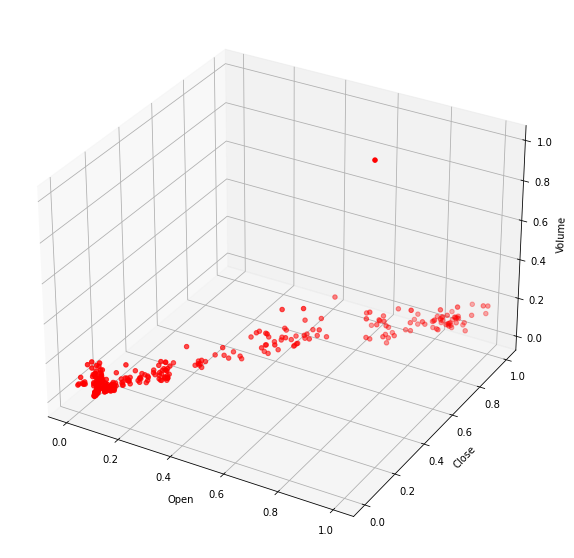

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x = bitcoin_features.iloc[0:362,:1]
y = bitcoin_features.iloc[0:362,-1:]
z = bitcoin_features.iloc[0:362,3:4]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel("Open")
ax.set_ylabel("Close")
ax.set_zlabel("Volume")
plt.show()   

So for this particular comparison between the open and close prices and volume of Bitcoin transactions I can see a positive linear relationship between 'Open' and 'Close' prices. As one increases in value, so does the other. The relationship they have with 'Volume' appears somewhat linear also except for and outlier when volume spiked on Feb 26th, 2021. This was apparently due to bets by Tesla and Mastercard and stood out significantly compared to anything seen previously this year.

Next I will perform both linear regression and polynomial regression to display prediction lines of best fit. I will only display the 'Close' price vs 'Date', so just two variables. I have chosen to manipulate data for price and time and store them in a new array called 'btc_new'.

In [13]:
# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")
# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

I have decided to create a new data array containing the variables for date and the daily close price, having converted the dates to straight forward number of days (ranging from 1 to 362), the same as the total number of 'non-null' entries.

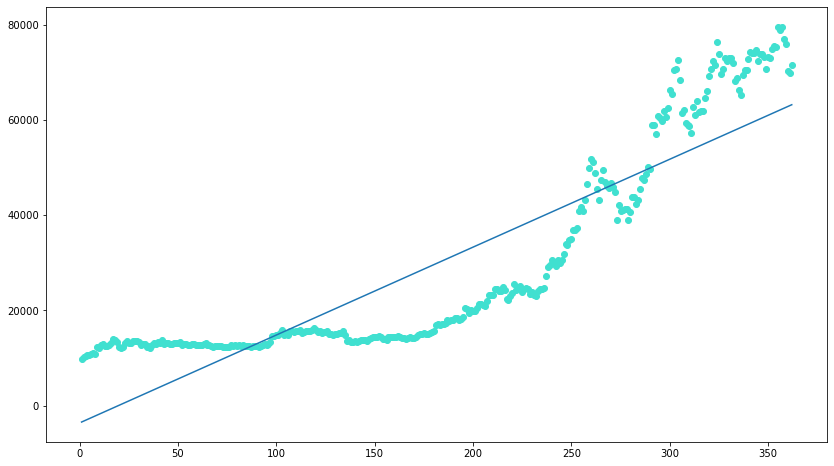

In [14]:
# Visualising the Linear Regression results
figure = plt.figure(figsize=(14,8))

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,
              42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,
              80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,
              113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,
              141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,
              169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,
              197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,
              225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,
              253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,
              281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,
              309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,
              337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362])
y = np.array([9763.94,10096.28,10451.16,10642.81,10669.64,10836.68,10941.6,10917.12,12211.47,12083.24,12644.26,12820.88,12576.13,
              12551.25,12642.56,13128.23,13904.59,13795.97,13448.25,12194.49,12061.87,12397.94,13062.2,13659.96,13162.55,
              13228.95,13627.94,13559.83,13560.94,13241.13,12666.33,12857.9,12895.3,12293.22,12445.06,12177.47,12630.37,13121.03,
              13000.03,13359.9,13034.29,13812.49,12873.86,13031.1,13233.33,12972.79,12956.88,13071.93,13063.21,13147.35,13253.52,
              12711.01,12883.57,12876.0,12803.02,12791.0,12907.76,12871.53,12793.94,12640.25,12700.57,12668.61,13028.33,13041.35,
              12707.97,12634.47,12541.29,12380.43,12506.51,12552.25,12404.78,12543.14,12380.24,12313.75,12374.98,12296.15,
              12693.78,12588.0,12745.56,12599.85,12614.86,12556.24,12613.8,12580.1,12571.09,12417.11,12394.21,12428.28,12437.98,
              12469.29,12395.2,12604.21,12781.59,12843.04,12796.08,12982.28,13288.45,14662.38,14600.23,14809.4,14902.15,15186.41,
              15771.32,14809.83,15064.88,14900.92,15582.92,15690.25,15529.15,15733.03,15633.23,15862.41,15187.81,15342.8,
              15581.58,15614.35,15742.82,15761.58,16203.14,15775.92,15535.99,15648.99,15273.86,15391.56,15375.86,15563.07,
              14964.79,15097.17,14859.35,15119.23,15072.56,15319.24,15230.27,15626.5,14891.18,13462.52,13731.63,13284.56,
              13442.84,13579.41,13413.77,13471.4,13668.72,13705.81,13760.17,13609.86,14073.93,14244.94,14466.7,14398.2,14452.49,
              14650.47,14436.9,13916.7,14013.41,13690.02,14346.23,14325.02,14397.66,14417.81,14322.13,14520.83,14357.78,14115.09,
              14089.38,14063.2,14203.03,14325.21,14149.28,14160.03,14410.83,14818.74,14949.65,15031.95,15206.57,14936.71,
              14984.18,15137.27,15487.81,15634.23,16869.5,17032.64,16973.62,17205.31,17133.71,17267.45,18012.41,17666.01,
              17893.39,18045.32,18357.66,18364.88,17915.13,18279.6,18553.15,20383.97,20332.17,19375.87,20159.37,19945.73,
              19926.42,20504.46,21384.43,21423.16,21095.38,20937.96,21858.82,23126.07,23303.57,23320.17,24380.23,24407.62,
              24036.96,24010.26,24836.84,24356.4,22332.26,22226.46,23017.67,23600.83,25498.36,24319.8,24803.39,25023.04,23905.97,
              24486.96,24726.68,24572.39,23481.02,23800.7,23272.47,23059.65,24014.9,24409.37,24561.12,24658.5,27166.03,29036.47,
              29589.87,30525.81,30075.87,29308.0,30662.86,29851.39,30529.54,31754.68,34036.36,33737.04,34786.05,35085.89,
              36777.84,36919.19,37393.09,40898.17,41711.19,40865.06,43089.99,46641.22,49945.91,51769.03,51079.4,48817.74,45432.6,
              43108.25,47383.3,49563.35,46905.54,46081.14,45711.01,46701.33,45888.95,44892.29,38992.07,42028.71,40834.13,
              41094.11,41229.38,41341.23,39009.81,40608.72,43844.33,43794.73,42390.85,43093.59,45408.61,47908.07,47359.34,
              48683.77,50115.41,49642.27,58850.14,59023.47,57035.0,60845.81,60319.29,59816.94,61818.59,60583.38,62545.24,
              66229.13,65537.27,70533.62,70772.35,72505.56,68363.29,61493.78,62195.54,59404.52,59028.47,58830.69,57312.2,62739.6,
              61132.9,64055.45,61573.38,61913.1,61894.22,64684.29,66138.41,69333.05,70691.19,72463.92,71526.08,76406.88,73947.62,
              69760.45,70684.33,72931.8,72297.91,73079.59,73038.24,72043.42,68277.85,68917.98,66392.34,65160.43,69541.94,
              70596.59,70416.7,72713.56,74365.91,74029.63,74156.38,74675.77,72436.89,73827.42,73942.95,73156.52,70708.54,
              73273.84,72978.66,74918.53,75463.91,75243.42,79598.41,78995.98,79437.88,77018.32,75906.36,70374.91,69788.23,
              71477.76])

# The array of x values
reg_line = np.linspace(1, 362)

# Applying a linear fit
polymodel = np.poly1d(np.polyfit(x, y, deg=1))

plt.scatter(x, y, color = 'turquoise')
plt.plot(reg_line, polymodel(reg_line))
plt.show()

This would represent a highly positive linear relationship between price and time over the last year, specifically a high bias and low variance regression line, or an 'under-fitted' model. 

Making sure the values work printing out the first 10 values of each list.

In [15]:
print(x[0:10])

[ 1  2  3  4  5  6  7  8  9 10]


In [16]:
print(y[0:10])

[ 9763.94 10096.28 10451.16 10642.81 10669.64 10836.68 10941.6  10917.12
 12211.47 12083.24]


Applying a polynomial degree of 2 this time provides an exponential curve. With a degree=2, the highest order value would be an exponent of 2, or x squared. The line used to capture these estimates are of low bias and low variance which is more suitable for prediction.

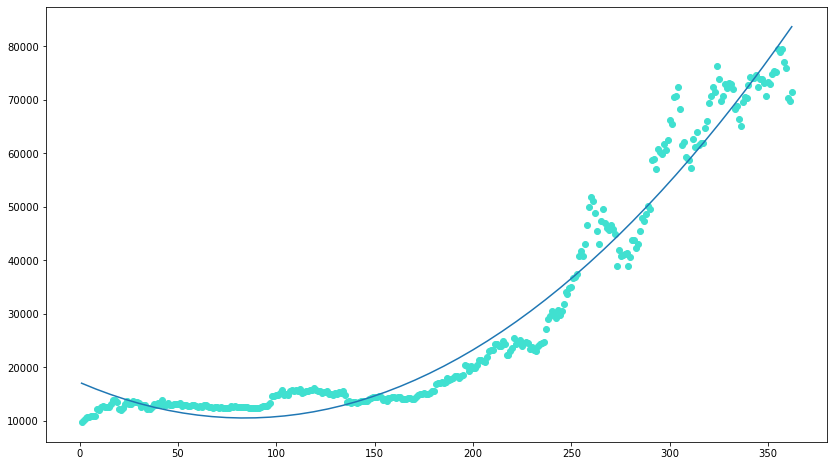

In [17]:
figure = plt.figure(figsize=(14,8))

polymodel = np.poly1d(np.polyfit(x, y, deg=2))

reg_line = np.linspace(1, 362)

plt.scatter(x, y, color = 'turquoise')
plt.plot(reg_line, polymodel(reg_line))
plt.show()

Using a polyfit method with a degree of 50.

C:\Users\lynst\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


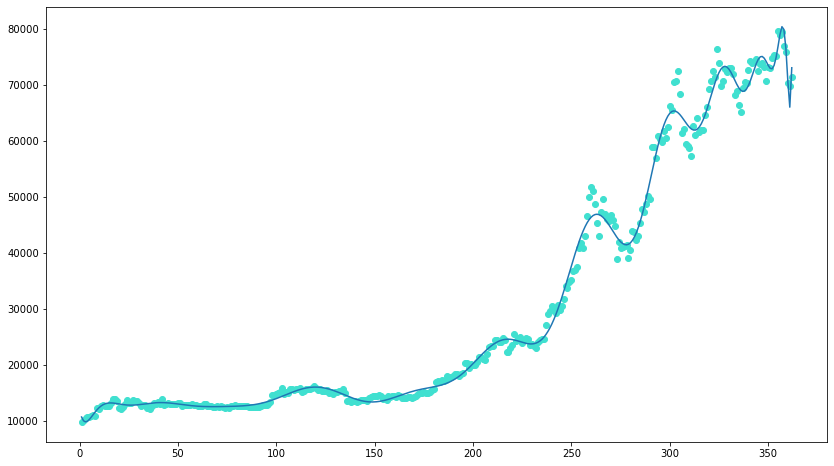

In [18]:
figure = plt.figure(figsize=(14,8))

polymodel = np.poly1d(np.polyfit(x, y, deg=50, rcond=None, full=False, w=None, cov=False))

reg_line = np.linspace(1, 362, 362)

plt.scatter(x, y, color = 'turquoise')
plt.plot(reg_line, polymodel(reg_line))
plt.show()

# to eliminate the rank warning run this cell twice
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In essence, this represents 'over-fitting' and a low bias / high variance model.

## Select and Train a Model
Having introduced a pipeline to clean the data and apply machine learning algorithms automatically I've chosen to apply a Linear Regression model first. Once again, selecting the data to model for each variable, but this time using four independent variables as input predictors so the polynomial algorithm can be applied to try and fit the model slightly better than before.

In [19]:
# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

# remove feature with string values - Date
del bitcoin['Date']

# remove adj close as I will not be using this
del bitcoin['Adj Close']

# select features as X dataframe
X = bitcoin[['Open','High','Low','Volume']]
print(X)

# select target as y series
y = bitcoin['Close']
print(y)

         Open      High       Low        Volume
0     9718.07   9838.33   9728.25  4.624843e+10
1     9762.68  10125.87   9747.39  4.716635e+10
2    10102.09  10533.73  10009.76  6.119120e+10
3    10457.43  10678.71  10457.43  4.881932e+10
4    10642.22  10773.18  10601.61  4.643028e+10
..        ...       ...       ...           ...
360  79368.23  79831.47  75262.20  1.050000e+11
361  76964.70  78268.41  75503.00  8.272967e+10
362  75928.95  76373.72  66081.83  1.220000e+11
363  70344.11  71803.61  68107.27  8.183693e+10
365  71509.30  71556.76  71132.08  8.495634e+10

[362 rows x 4 columns]
0       9763.94
1      10096.28
2      10451.16
3      10642.81
4      10669.64
         ...   
360    77018.32
361    75906.36
362    70374.91
363    69788.23
365    71477.76
Name: Close, Length: 362, dtype: float64


## Scaling
Remember to apply the scaling because 'Volume' has different units of measurement.

In [20]:
# making a copy of the dataset
bitcoin = bitcoin.copy()

# import preprocessing from sci-kit learn
from sklearn import preprocessing

# define min max scaler
min_max_scaler = preprocessing.MinMaxScaler()

# transform data
X_scaled = min_max_scaler.fit_transform(X)
coin_features = pd.DataFrame(X_scaled)
coin_features.to_csv(r'C:\Users\lynst\Documents\GitHub\machine-learning-projects\machine-learning\bitcoin_features.csv', index = False, header = True)

print(coin_features)

            0         1         2         3
0    0.000000  0.000000  0.000000  0.068801
1    0.000638  0.004016  0.000281  0.070934
2    0.005493  0.009711  0.004140  0.103523
3    0.010577  0.011736  0.010724  0.074775
4    0.013220  0.013055  0.012844  0.069224
..        ...       ...       ...       ...
357  0.996343  0.977458  0.963766  0.205318
358  0.961961  0.955629  0.967307  0.153570
359  0.947145  0.929170  0.828756  0.244820
360  0.867254  0.865348  0.858543  0.151496
361  0.883922  0.861901  0.903027  0.158744

[362 rows x 4 columns]


Having established a more comparible set of values for the entire dataset, I can proceed with application of my Polynomial model.

Before using the polynomial model I will train and fit a Linear Regression algorithm to learn from the entire dataset before the prediction or validation phase.

## Fit the Linear Regression Model

In [21]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [22]:
# printing the r2 score
print(lin_reg.score(X, y))

0.9991952571049215


Technically the dataset should be split into training and test sets so I can fit the model to the training set and learn from it, before validating the accuracy metric against the test set. If I fit the linear regression model to all data points, then split them into two different sets for training or testing, I would be introducing bias into the model.

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Re-running the r-squared score metric I get:

In [24]:
print('R2: %0.8f' %r2_score(y_test, lin_reg.predict(X_test)))

R2: 0.99949546


This indicates that the model is generalizing well as the validation score is higher for the test set than the training set. This is a good sign! It could indicate a degree of data leakage because the score is so high, meaning it may not be the best representation of the correlation measure between the target and predictors because they're all extremely highly correlated.

To obtain a descriptive statistical summary I use the describe( ) function which provides figures I can use to calculate the R-squared manually....not just relying on the sklearn.metrics module.

In [25]:
coin_features.describe()

,0,1,2,3
count,362.000000,362.000000,362.000000,362.000000
mean,0.285944,0.289319,0.281567,0.085998
std,0.311470,0.313966,0.308727,0.076621
min,0.000000,0.000000,0.000000,0.000000
25%,0.052297,0.053712,0.048940,0.034360
50%,0.097304,0.102385,0.095959,0.070940
75%,0.500117,0.514592,0.474575,0.122357
max,1.000000,1.000000,1.000000,1.000000


I can check the R-squared value and plug in the inputs manually to see if it works.

Defining the intercept and coefficient values for x1, x2 ... xn from the linear regression before plugging in their values to the linear regression equation.

In [26]:
lin_reg.intercept_

104.14703834189277

In [27]:
lin_reg.coef_

array([-4.32747159e-01,  9.17019324e-01,  5.08535340e-01, -1.62880794e-09])

Using the X values from the first row.

In [28]:
X[:1]

,Open,High,Low,Volume
0,9718.07,9838.33,9728.25,4.624843e+10


Given this is linear regression and there are no polynomial terms I can calculate a prediction based on the following:

y = a + b1x1 + b2x2 + b3x3 + b4x4

Then, this will form the basis for my predictive model so I assign the values to a new variable called 'y_pred'.

In [29]:
# linear regression terms for intercept and coefficients for row 1 values:
a = lin_reg.intercept_ = 104.15
b1 = lin_reg.coef_[0] = -0.43
b2 = lin_reg.coef_[1] = 0.92
b3 = lin_reg.coef_[2] = 0.51
b4 = lin_reg.coef_[3] = -0.0000000016
x1 = X['Open'] # = 9718.07
x2 = X['High'] # = 9838.33
x3 = X['Low'] # = 9728.25
x4 = X['Volume'] # = 46248330000.0
y = 9763.94
y_mean = 29864.75

Given the actual values, inetercept and coefficients (slopes), I can calculate predicted values.

In [30]:
y_pred = a + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4)
y_pred = 104.15 + (-0.43 * 9718.07) + (0.92 * 9838.33) + (0.51 * 9728.25) + (-0.0000000016 * 46248330000.0)
print(y_pred)

9864.053672


The actual y value for the first row in the table was 9763.94. To calculate the R-squared score using the definitive statistical formula gives the following result.

In [31]:
r2 = 1 - ((np.sum(y_pred - y)**2) / (np.sum(y_mean - y)**2))
print("The r-squared value is:", r2)

The r-squared value is: 0.9999751938329084


This is similar to the above score for the entire dataset but remember this is only for the first row in the table. Repeating this process for the entire dataset this time may require a little more thought as I need to iterate through all the values and integrate these inputs and define them as part of a new function:

In [32]:
a = 104.15
b1 = -0.43
b2 = 0.92
b3 = 0.51
b4 = -0.0000000016
x1 = X['Open']
x2 = X['High']
x3 = X['Low']
x4 = X['Volume']

# obtaining the predicted values for y
def prediction():
    for i in range(len(X)):
        i = i + 1
        y_pred = a + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4)
    print(y_pred)
   
prediction

<function __main__.prediction()>

In [33]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# create actual and predicted values
y = bitcoin['Close']
actual = y

y_pred = a + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4)
predicted = y_pred

In [34]:
actual[0:10]

0     9763.94
1    10096.28
2    10451.16
3    10642.81
4    10669.64
5    10836.68
6    10941.60
7    10917.12
8    12211.47
9    12083.24
Name: Close, dtype: float64

In [35]:
predicted[0:10]

0     9864.053515
1    10117.700737
2    10458.354577
3    10687.046691
4    10771.853653
5    10864.954374
6    10956.095958
7    10896.645189
8    12144.183875
9    12831.897689
dtype: float64

Mean Squared Error is: 454793.55018377956
Root Mean Squared Error is: 674.3838300135758




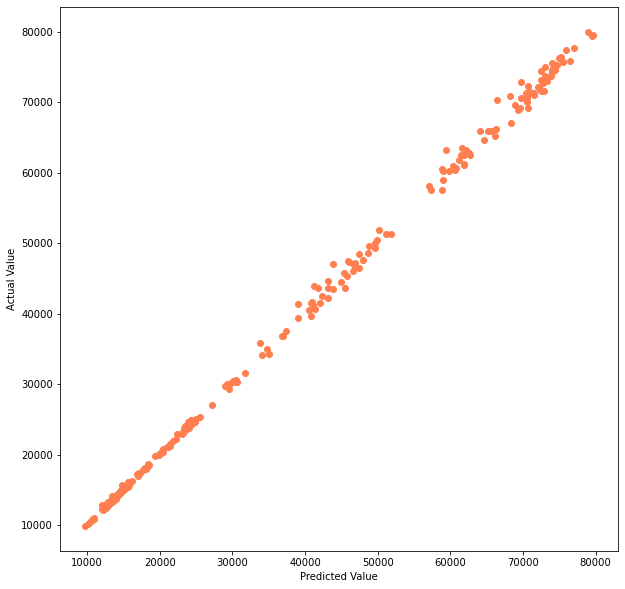

In [36]:
# create error values
error = actual - predicted
error = y - y_pred
errors = np.sum(error)
errors = list()
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

def summary_stats():
    for i in range(len(actual)):
        error = actual - predicted
        error = y - y_pred
        errors = np.sum(error)
        errors = np.sum(y - y_pred)
        errors = list()
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        
summary_stats()

print("Mean Squared Error is:", mse)
print("Root Mean Squared Error is:", rmse)
print("\n")

# plot errors
fig = pyplot.figure(figsize=(10,10))
pyplot.plot(errors)
pyplot.scatter(y, y_pred, color = 'coral')
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Actual Value')
pyplot.show()

Having trained my model on predictor inputs, labeled targets and establishing a measure for the root mean squared error or the 'Loss Function', this can be used to compare the predictions to the targets. An important point to note is that it's better to better to perform scores on unseen test data that isn't used in the training phase. I can assess this measure as the level of risk or the degree of the dispersion of data observations about their mean. The r-squared score is the degree of accuracy of the linear relationship.

## Fit the Polynomial Model
Using the 'Open', 'High', 'Low' and 'Volume' input features and 'Close' as the output target can be modeled using the following Polynomial Regression formula for predicting y values:


$$  y = a + b1x1 + b2x2 + b3x3 + b4x4 + {(b5x1)^2} + {(b6x2)^2} + {(b7x3)^2} + {(b8x4)^2} + b9x1x2 + b10x1x3 + b11x1x4 + b12x2x3 + b13x2x4 + b14x3x4  $$


So I can see there are a total of 15 terms in this polynomial function which includes an intercept value (a) and several coefficients for each value of X, X-squared and the cross-multiplied combinations, cross-product, or vector-product of all features (x1, x2, x3, x4 etc).

In [37]:
# Fitting Polynomial Regression followed by Linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
 
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures()

There is no r-squared score for the polynomial model because the resultant training set (which is non-linear) has a different number of features than original.

## Split the Dataset
First I've decided to import the train_test_split function to split the dataset into respective training and test sets (for both X and y values in each set).

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

## Applying Regularization to the Model
In this particular instance I have chosen L2 regularization which will penalize the Loss (or cost) function by summing the coefficients and equalizing features which exhibit strong colinearity, while simultaneously reducing the effect of redundant coefficients. (See the colinearity matrix in the previous <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> model). For the purpose of this exercise the Root Mean Squared Error is used as the loss function.

Note, I have two hyperparameters I can adjust here including 'alpha' and 'normalize'. The 'alpha' value is the learning rate which controls the size of the incremental steps for the learning rate and the 'normalize' adjustment will re-scale the feature values between 0 and 1 for each observation in the dataset. An r-squared score will be used to determine its accuracy.

In [39]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, normalize=True)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

Having expanded the dataset using degree=2, a Polynomial Regression model does not have a score method so the dataset first has to be standardized using a linear model of some description. In this instance I am going to apply RidgeRegression() rather than straight forward LinearRegression() because the next important step is to standardize data using a regularization technique and reducing the scale of the units of measurement somewhere between -1 and +1, or between 0 and 1 depending on the scale I've chosen. Then the accuracy score can be applied after standardization.

## Check the Accuracy Score for the Ridge Regression Fit
To see how close the relationship between X_poly and y is.

In [40]:
ridge_reg = LinearRegression()
ridge_reg.fit(X_poly, y)
print('R2: %0.8f' %r2_score(y_test, ridge_reg.predict(X_test)))

R2: 0.97936003


## Re-scaling the Polynomial Dataset
Some of the values in this table would be far too large and exacerbate the effects of the model, so once again I have to scale the values and save the result as a csv file.

In [41]:
# create a new copy of the dataset
X_poly = X_poly.copy()

# import preprocessing from sci-kit learn
from sklearn import preprocessing

# define min max scaler
min_max_scaler = preprocessing.MinMaxScaler()

# transform data
X_poly_scaled = min_max_scaler.fit_transform(X_poly)
X_poly_features = pd.DataFrame(X_poly_scaled)
X_poly_features.to_csv(r'C:\Users\lynst\Documents\GitHub\machine-learning-projects\machine-learning\X_poly_features.csv', index = False, header = True)

print(X_poly_features)

      0         1         2         3         4         5         6   \
0    0.0  0.000000  0.000000  0.000000  0.068801  0.000000  0.000000   
1    0.0  0.000638  0.004016  0.000281  0.070934  0.000139  0.000508   
2    0.0  0.005493  0.009711  0.004140  0.103523  0.001219  0.001691   
3    0.0  0.010577  0.011736  0.010724  0.074775  0.002388  0.002514   
4    0.0  0.013220  0.013055  0.012844  0.069224  0.003013  0.002980   
..   ...       ...       ...       ...       ...       ...       ...   
357  0.0  0.996343  0.977458  0.963766  0.205318  0.993493  0.976690   
358  0.0  0.961961  0.955629  0.967307  0.153570  0.933329  0.927832   
359  0.0  0.947145  0.929170  0.828756  0.244820  0.907974  0.892628   
360  0.0  0.867254  0.865348  0.858543  0.151496  0.777174  0.775557   
361  0.0  0.883922  0.861901  0.903027  0.158744  0.803639  0.785889   

           7         8         9         10        11        12        13  \
0    0.000000  0.009260  0.000000  0.000000  0.009091  0.0

In [42]:
X_poly_features.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,362.0,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,0.0,0.285944,0.289319,0.281567,0.085998,0.201882,0.203430,0.201590,0.068476,0.205139,0.203212,0.068624,0.198187,0.069836,0.018472
std,0.0,0.311470,0.313966,0.308727,0.076621,0.289511,0.290496,0.289811,0.093199,0.291888,0.291011,0.093289,0.286078,0.093804,0.054482
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.052297,0.053712,0.048940,0.034360,0.013517,0.013694,0.013232,0.009673,0.013841,0.013484,0.009502,0.012750,0.009878,0.003562
50%,0.0,0.097304,0.102385,0.095959,0.070940,0.028593,0.029021,0.028813,0.021582,0.030294,0.029576,0.021834,0.028549,0.022574,0.009763
75%,0.0,0.500117,0.514592,0.474575,0.122357,0.304526,0.313828,0.290788,0.126675,0.318648,0.303958,0.129261,0.280701,0.132906,0.022679
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_poly_features[:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.068801,0.0,0.0,0.0,0.00926,0.0,0.0,0.009091,0.0,0.009871,0.009332


So looking into the first entry of a DataFrame object after applying regularization (L2, Ridge Regression) I can see that where a high degree of multi-colinearity exists between the features, the coefficients of those particular features are given a 'zero' value negating their effect on the model. It's the same as removing them completely. Any remaining coefficients which are positive in value (albeit negligable) stand out and obviously contribute more toward the calculation of the cost function, error calculation accuracy and optimization through iterative single-step gradient Descent.

In [49]:
ridge_reg.intercept_

11252.621734734392

In [50]:
ridge_reg.coef_

array([ 0.00000000e+00,  2.20274036e-08,  1.01935648e-10,  9.51892565e-11,
        3.60723223e-08, -7.32977764e-06, -7.82330374e-07, -9.48440941e-07,
       -2.11819215e-13,  5.91877653e-06,  5.75005955e-06,  2.53097632e-12,
        5.46672010e-06,  1.44524432e-12, -4.88291757e-19])

In [51]:
X_poly[:1]

array([[1.00000000e+00, 9.71807000e+03, 9.83833000e+03, 9.72825000e+03,
        4.62484281e+10, 9.44408845e+07, 9.56095796e+07, 9.45398145e+07,
        4.49445461e+14, 9.67927372e+07, 9.57097338e+07, 4.55007297e+14,
        9.46388481e+07, 4.49916270e+14, 2.13891710e+21]])

In [52]:
# polynomial regression terms for intercept and coefficients for row 1 values:
a = ridge_reg.intercept_ = 11252.62
b1 = ridge_reg.coef_[0] = 0.00000000e+00
b2 = ridge_reg.coef_[1] = 2.20274036e-08
b3 = ridge_reg.coef_[2] = 1.01935648e-10
b4 = ridge_reg.coef_[3] = 9.51892565e-11
b5 = ridge_reg.coef_[4] = 3.60723223e-08
b6 = ridge_reg.coef_[5] = -7.32977764e-06
b7 = ridge_reg.coef_[6] = -7.82330374e-07
b8 = ridge_reg.coef_[7] = -9.48440941e-07
b9 = ridge_reg.coef_[8] = -2.11819215e-13
b10 = ridge_reg.coef_[9] = 5.91877653e-06
b11 = ridge_reg.coef_[10] = 5.75005955e-06
b12 = ridge_reg.coef_[11] = 2.53097632e-12
b13 = ridge_reg.coef_[12] = 5.46672010e-06
b14 = ridge_reg.coef_[13] = 1.44524432e-12
b15 = ridge_reg.coef_[14] = -4.88291757e-19
x1 = 1.0
x2 = X['Open']         # = 9718.07
x3 = X['High']         # = 9838.33
x4 = X['Low']          # = 9728.25
x5 = X['Volume']       # = 46248330000.0
x6 = (X['Open'])**2    # = (9.44408845e+07)**2
x7 = (X['High'])**2    # = (9.56095796e+07)**2
x8 = (X['Low'])**2     # = (9.45398145e+07)**2
x9 = (X['Volume'])**2  # = (4.49445461e+14)**2
x10 = x1 * x2          # = 9.67927372e+07
x11 = x1 * x3          # = 9.57097338e+07
x12 = x1 * x4          # = 4.55007297e+14
x13 = x2 * x3          # = 9.46388481e+07
x14 = x2 * x4          # = 4.49916270e+14
x15 = x3 * x4          # = 2.13891710e+21

y = 9763.94
y_mean = 29864.75

In [53]:
y_pred = a + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4) + (b5*x5) + (b6*x6) + (b7*x7) + (b8*x8) + (b9*x9) + (b10*x10) + (b11*x11) + (b12*x12) + (b13*x13) + (b14*x14)
y_pred = 11252.62 + (0.0 * 1.0) + (2.20274036e-08 * 9.71807000e+03) + (1.01935648e-10 * 9.83833000e+03) + (9.51892565e-11 * 9.72825000e+03) + (3.60723223e-08 * 4.62484281e+10) + (-7.32977764e-06 * 9.44408845e+07) + (-7.82330374e-07 * 9.56095796e+07) + (-9.48440941e-07 * 9.45398145e+07) + (-2.11819215e-13 * 4.49445461e+14) + (5.91877653e-06 * 9.67927372e+07) + (5.75005955e-06 * 9.57097338e+07) + (2.53097632e-12 * 4.55007297e+14) + (5.46672010e-06 * 9.46388481e+07) + (1.44524432e-12 * 4.49916270e+14) + (-4.88291757e-19 * 2.13891710e+21)

print(y_pred)

14367.044225465808


Once again, comparing this predicted value against the actual y value for the first row in the table of 9763.94, there is quite a difference. To calculate the R-squared score using the definitive statistical formula gives the following result.

In [54]:
r2 = 1 - ((np.sum(y_pred - y)**2) / (np.sum(y_mean - y)**2))
print("The r-squared value is:", r2)

The r-squared value is: 0.9475585731087054


In [55]:
# create actual and predicted values
y = bitcoin['Close']
actual = y

y_pred = a + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4) + (b5*x5) + (b6*x6) + (b7*x7) + (b8*x8) + (b9*x9) + (b10*x10) + (b11*x11) + (b12*x12) + (b13*x13) + (b14*x14)
predicted = y_pred

In [56]:
actual[0:10]

0     9763.94
1    10096.28
2    10451.16
3    10642.81
4    10669.64
5    10836.68
6    10941.60
7    10917.12
8    12211.47
9    12083.24
Name: Close, dtype: float64

In [58]:
predicted[0:10]

0   -4.530512e+08
1   -4.712141e+08
2   -7.931150e+08
3   -5.048216e+08
4   -4.566212e+08
5   -4.612228e+08
6   -5.456652e+08
7   -4.562004e+08
8   -1.477874e+09
9   -1.849817e+09
dtype: float64

The negative effects of the coefficients and their small values have significantly reduced the squared-terms and the cross-product terms making them negligable.

Mean Squared Error is: 5.992224369643165e+18
Root Mean Squared Error is: 2447902034.3230987




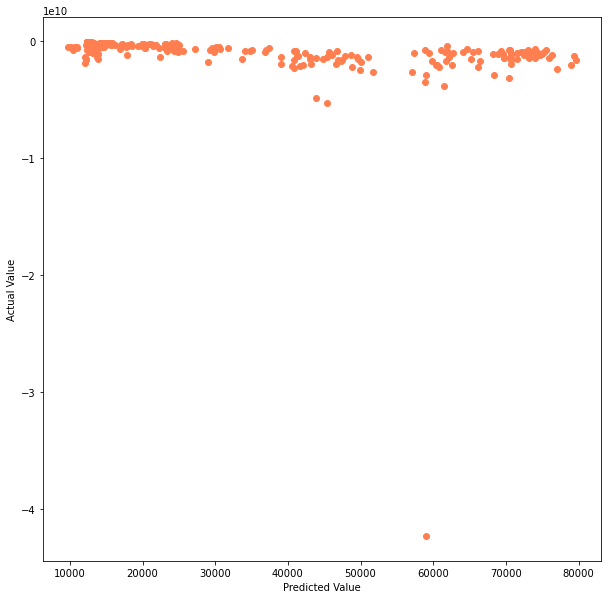

In [59]:
# create error values
error = actual - predicted
error = y - y_pred
errors = np.sum(error)
errors = list()
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

def summary_stats():
    for i in range(len(actual)):
        error = actual - predicted
        error = y - y_pred
        errors = np.sum(error)
        errors = list()
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        
summary_stats()

print("Mean Squared Error is:", mse)
print("Root Mean Squared Error is:", rmse)
print("\n")

# plot errors
fig = pyplot.figure(figsize=(10,10))
pyplot.plot(errors)
pyplot.scatter(y, y_pred, color = 'coral')
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Actual Value')
pyplot.show()

The first note I can make about actual vs predicted daily closing prices leaves me to believe the errors have been reduced significantly about their mean, but I'm not entirely happy with the large value for the Cost function (RMSE) as this implies considerable over-fitting. One way to 

Because the loss function (RMSE) and the accuracy score (R-squared) can be improved upon, the next phase involves using an 'Optimization Function' to re-balance the coefficients of each data point reiterating through the data in an attempt to reduce the loss function. This will involve the adoption of optimization techniques such as 'Gradient Descent', particularly the SGDRegressor() algorithm.

## Stochastic Gradient Descent
Gradient descent provides an alternative way to measure 'Loss' which can be described as an iterative process of adjusting the parameters of a model, fine-tuning the gradient coefficients to minimize the overall loss.

In [66]:
# import the necessary models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Store model in a variable
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X_train, y_train)

SGDRegressor(penalty=None)

In [61]:
print(sgd_reg.score(X_test, y_test))

-1.1862094716918695e+51


In [67]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_test, y_test))

-1.7157144010547347e+51


It would be best to introduce cross-validation to find the best achievable score for a pre-determined number of folds in the dataset.

In [ ]:


print('R2: %0.8f' %r2_score(y_test, reg_regression.predict(X_test)))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

So the accuracy has decreased slightly after using a Polynomial model and applying Ridge Regression to the entire dataset, but if I were to try fitting it only to the training set I get the following score: 

In [ ]:
reg_regression = Ridge(alpha=0.1, normalize=True)
reg_regression.fit(X_train, y_train)
print('R2: %0.8f' %r2_score(y_test, reg_regression.predict(X_test)))

A marginal improvement, but I really need to fine-tune some of the hyperparameters in the ridge regression algorithm in order to improve this score. Removing the 'normalize' hyper-parameter seems to help as I already pre-processed the data using a MinMaxScaler above. 

Adjusting the 'alpha' parameter doesn't appear to improve the score but using the 'solver' parameter helps. It is set to the default value of 'auto'.

In [ ]:
reg_regression = Ridge(alpha=0.1, solver="auto")
reg_regression.fit(X_train, y_train)
print('R2: %0.8f' %r2_score(y_test, reg_regression.predict(X_test)))

I can deduce that the accuracy for determining predictions appears to be highest for plain linear regression, before any polynomial modeling is applied. This is probably due to the strong nature of the association between the price variables, or their degree of co-linearity.

## Predicting Against Test Set
Now to predict the test set results.

In [ ]:
y_test_pred = lin_reg.predict(X_test)

# to see the first ten results
y_test_pred[0:10]

Comparing the first row of X values to predict the y value by copying from the dataset output from cell 1. Remember only to use the 'Open', 'High', 'Low' and 'Volume' values.

In [ ]:
lin_reg.predict([[9718.07, 9838.33, 9728.25, 4.624843e+10]])

So the predicted y value is 9792.45 and the actual y value (from output of the first value for 'Close' price) is 9763.94, which is reasonably accurate.

## Model Evaluation
This is where I need to look into the root mean squared error and R-squared values to see how well the model is performing.

In [ ]:
# import the score measure
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

### Actual vs Predicted Prices
Plotting the actual and predicted results for the 'Close' price provides a nice visual display of the relationship.

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_test_pred, color="orange")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Prices")
plt.show()

## Predictions
Storing the actual and predicted values and their difference in a dictionary object becomes useful. The larger the error, the greater the variance and subsequent standard deviation which translates to less accurate predictions and a less reliable model. 

Why does this become important? The main purpose of this exercise is to see how useful my model would be in predicting the daily closing price so the first information I can derive from the scatter plot above shows the relationship between independent and dependent variables is strong, but also incredibly linear. It may not pay off to apply Polynomial Regression in such circumstances but may improve the linear fit to the data points with increasing degrees of freedom.

In [ ]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred, "Error": y_test - y_test_pred})
predictions[0:10]

Exploring the entire dataset (all the X and y values) and the degree of accuracy by fitting a linear regression predictive line once more, but this time calling Seaborn's regression plot function (regplot).

In [ ]:
import seaborn as sns

# set the width and height of the plot
plt.figure(figsize=(15,10))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, y_test_pred, color="orange")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=y_test_pred, color="orange")

The scatter plot explains how actual and expected prices do not diverge too far from one another, with the dots representing actual 'Close' prices and the line representing expected or predicted 'Close' prices.

Suppose I were to re-run the polynomial model with only 2 degrees of freedom as a parameter. From the beginning I can train the dataset using a new model.

## Training a new Polynomial model
Importing the relevant libraries and instantiating the polynomial function is the first step. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

# remove feature with string values - Date
del bitcoin['Date']

# remove adj close as I will not be using this
del bitcoin['Adj Close']

# select features as X dataframe
X = bitcoin[['Open','High','Low','Volume']]
print(X)

# select target as y series
y = bitcoin['Close']
print(y)

The first stage will produce an expanded feature set for the entire dataframe with quadratic terms (degree=2). I will attempt to tune this hyperparameter later to see if it can optimize the Loss function. The independent variables or features are selected as well as the target variable, unnecessary columns and rows are removed as part of the cleaning process.

In [ ]:
# initialize the model for a given degree
poly_features = PolynomialFeatures(degree=2, include_bias=True)
  
# transforms the existing features to higher degree features.
poly_X = poly_features.fit_transform(X)

Using indexation to return any value in X, say up to but not including the 1st value.

In [ ]:
X[:1]

Now repeating for the data contained in the 'poly_X' set and we can see that there are 15 values returned so it has created an array with 11 new features for a total of 15 features (giving both the original feature values for 'X1' to 'Xn', each feature value squared and dot product or cross-multiplication of each individual feature are returned in this example).

In [ ]:
poly_X[:1]

Saving the current dataframe to an Excel workbook formatted file for preservation to view the degree of newly expanded features in a fresh table. Check the first row entries above against the new excel table below.

In [ ]:
import pandas as pd
df = pd.DataFrame(poly_X)
df.to_excel("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/poly_X.xlsx", sheet_name='poly_X')

### Splitting the Data
Using this data for the Polynomial Features model and splitting it into training and test sets with a 70-30 split. 

In [ ]:
# then split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3, random_state = 42)

The number of entries (rows) by the number of features (cols):

In [ ]:
print(X.shape)
print(y.shape)

The shape of the new dataset with all the extended features is much larger and I can see a distinctive change in dimensions. Printing out the shape of the training set from the polynomial data gives:

In [ ]:
print(poly_X.shape)

Now for the training sets for X and y, 70% of the total values.

In [ ]:
print(X_train.shape)
print(y_train.shape)

And the shape of the test data.

In [ ]:
print(X_test.shape)
print(y_test.shape)

### Making a Prediction
Comparing predictions for training set and test set values. I am continuing to use the RMSE as the score measure to see if it can be optimized as far as possible for the purpose of this model.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=y_test_pred)

# evaluating the model on train dataset
y_train = lin_reg.fit(y_train)
y_train_pred = lin_reg.predict(y_train)

# evaluating the model on test dataset
mse_train = np.sum(y_train - y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")

print("MSE of the train set is {}".format(mse_train))
print("RMSE of train set is {}".format(rmse_train))
print("R2 score of train set is {}".format(r2_train))

print("MSE of the test set is {}".format(mse_test))
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

print("\n")

Interpreting the RMSE tells me the results seem too high.

In [ ]:
# for polynomial regression
y_train_pred = a + b1x1 + b2x2 + b3x3 + b4x4 + (b5x1)**2 + (b6x2)**2 + (b7x3)**2 + (b8x4)**2 + b9x1*x2 + b10x1*x3 + b11x1*x4 + b12x2*x3 + b13x2*x4 + b14x3*x4
a = 
error = y_train - y_train_pred
mse = np.sum(error)**2
rmse = np.sqrt(mse)

y_train = lin_reg.fit(y_train)
y_train_pred = lin_reg.predict(y_train)

def mse_train():
    for i in range(1, 362):
        i += 1
    
    error = y_train - y_pred
    mse_train = sum(i * (error)**2)
mse_train

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# actual values
y_train = lin_reg.fit(y_train)

# predicted values
y_train_pred = lin_reg.predict(y_train)

# calculate errors
err = (y_train[i] - y_train_pred[i])**2
errors = list()

for i in range(len(y_train)):
    # calculate error
    err = (y_train[i] - y_train_pred[i])**2
    # store error
    errors.append(err)
    # report error
    print('>%.1f, %.1f = %.3f' % (y_train[i], y_train_pred[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
y_test_pred = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
#lin_reg.predict([[363]])

In [ ]:
#lin_reg2.predict(poly.fit_transform([[363]]))

## Pipelines
To better capture the different features I have used in my multiple regression I will employ the use of a Pipeline to include the different types of regression models, re-scaling of the features with different units of measurement, regularization techniques to improve the degree of overall fit before validation.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True)),
    ('scale', StandardScaler()),
    ('scores', )
    ])

'''
scores = cross_val_score

pipeline.fit(X, y)
y_pred = pipeline.predict(X)
print(y_pred)
'''